In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('laptop_pricing.csv')

In [4]:
df.head()

,Manufacturer,IntelCore(i-),IntelCoreGen,processing speed(GHz),Ram(gb),HDD(gb),SSD(gb),Graphics(gb),ScreenSize(inch),Price
0,Dell,3,7,2.29,4.0,1000,0,0,15.6,39057
1,Dell,3,7,2.30,4.0,1000,0,0,15.6,45141
2,HP,3,7,2.30,8.0,256,256,0,14.0,35999
3,ASUS,3,7,2.30,NaN,1000,0,0,14.0,39990
4,HP,3,7,2.40,4.0,1000,0,0,15.6,36263


In [5]:
df.shape

(105, 10)

In [6]:
df.describe()

,IntelCore(i-),IntelCoreGen,processing speed(GHz),Ram(gb),HDD(gb),SSD(gb),Graphics(gb),ScreenSize(inch),Price
count,105.000000,105.000000,105.000000,96.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,4.152381,8.495238,2.314000,8.500000,945.866667,122.514286,1.733333,15.375238,75816.838095
std,1.890162,1.866320,0.384179,6.799381,171.405113,177.446206,2.462280,0.726528,73721.391764
min,1.000000,3.000000,1.600000,4.000000,256.000000,0.000000,0.000000,14.000000,26052.000000
25%,3.000000,8.000000,2.200000,4.000000,1000.000000,0.000000,0.000000,15.600000,37627.000000
50%,3.000000,9.000000,2.300000,8.000000,1000.000000,0.000000,0.000000,15.600000,45390.000000
75%,5.000000,10.000000,2.400000,8.000000,1000.000000,256.000000,4.000000,15.600000,99415.000000
max,7.000000,11.000000,3.900000,32.000000,1000.000000,512.000000,8.000000,17.300000,417052.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Manufacturer           105 non-null    object 
 1   IntelCore(i-)          105 non-null    int64  
 2   IntelCoreGen           105 non-null    int64  
 3   processing speed(GHz)  105 non-null    float64
 4   Ram(gb)                96 non-null     float64
 5   HDD(gb)                105 non-null    int64  
 6   SSD(gb)                105 non-null    int64  
 7   Graphics(gb)           105 non-null    int64  
 8   ScreenSize(inch)       105 non-null    float64
 9   Price                  105 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 8.3+ KB


In [8]:
df['Ram(gb)'].fillna(np.mean(df['Ram(gb)']), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_23824\2052549986.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ram(gb)'].fillna(np.mean(df['Ram(gb)']), inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Manufacturer           105 non-null    object 
 1   IntelCore(i-)          105 non-null    int64  
 2   IntelCoreGen           105 non-null    int64  
 3   processing speed(GHz)  105 non-null    float64
 4   Ram(gb)                105 non-null    float64
 5   HDD(gb)                105 non-null    int64  
 6   SSD(gb)                105 non-null    int64  
 7   Graphics(gb)           105 non-null    int64  
 8   ScreenSize(inch)       105 non-null    float64
 9   Price                  105 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 8.3+ KB


In [10]:
df = pd.get_dummies(df,drop_first=True)

In [11]:
df.head()

,IntelCore(i-),IntelCoreGen,processing speed(GHz),Ram(gb),HDD(gb),SSD(gb),Graphics(gb),ScreenSize(inch),Price,Manufacturer_Dell,Manufacturer_HP,Manufacturer_Lenovo
0,3,7,2.29,4.0,1000,0,0,15.6,39057,True,False,False
1,3,7,2.30,4.0,1000,0,0,15.6,45141,True,False,False
2,3,7,2.30,8.0,256,256,0,14.0,35999,False,True,False
3,3,7,2.30,8.5,1000,0,0,14.0,39990,False,False,False
4,3,7,2.40,4.0,1000,0,0,15.6,36263,False,True,False


In [12]:
from sklearn.model_selection import train_test_split
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score

reg = tree.DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, min_samples_split=10)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mse, r2

(37748105.15542704, 0.962946673270631)

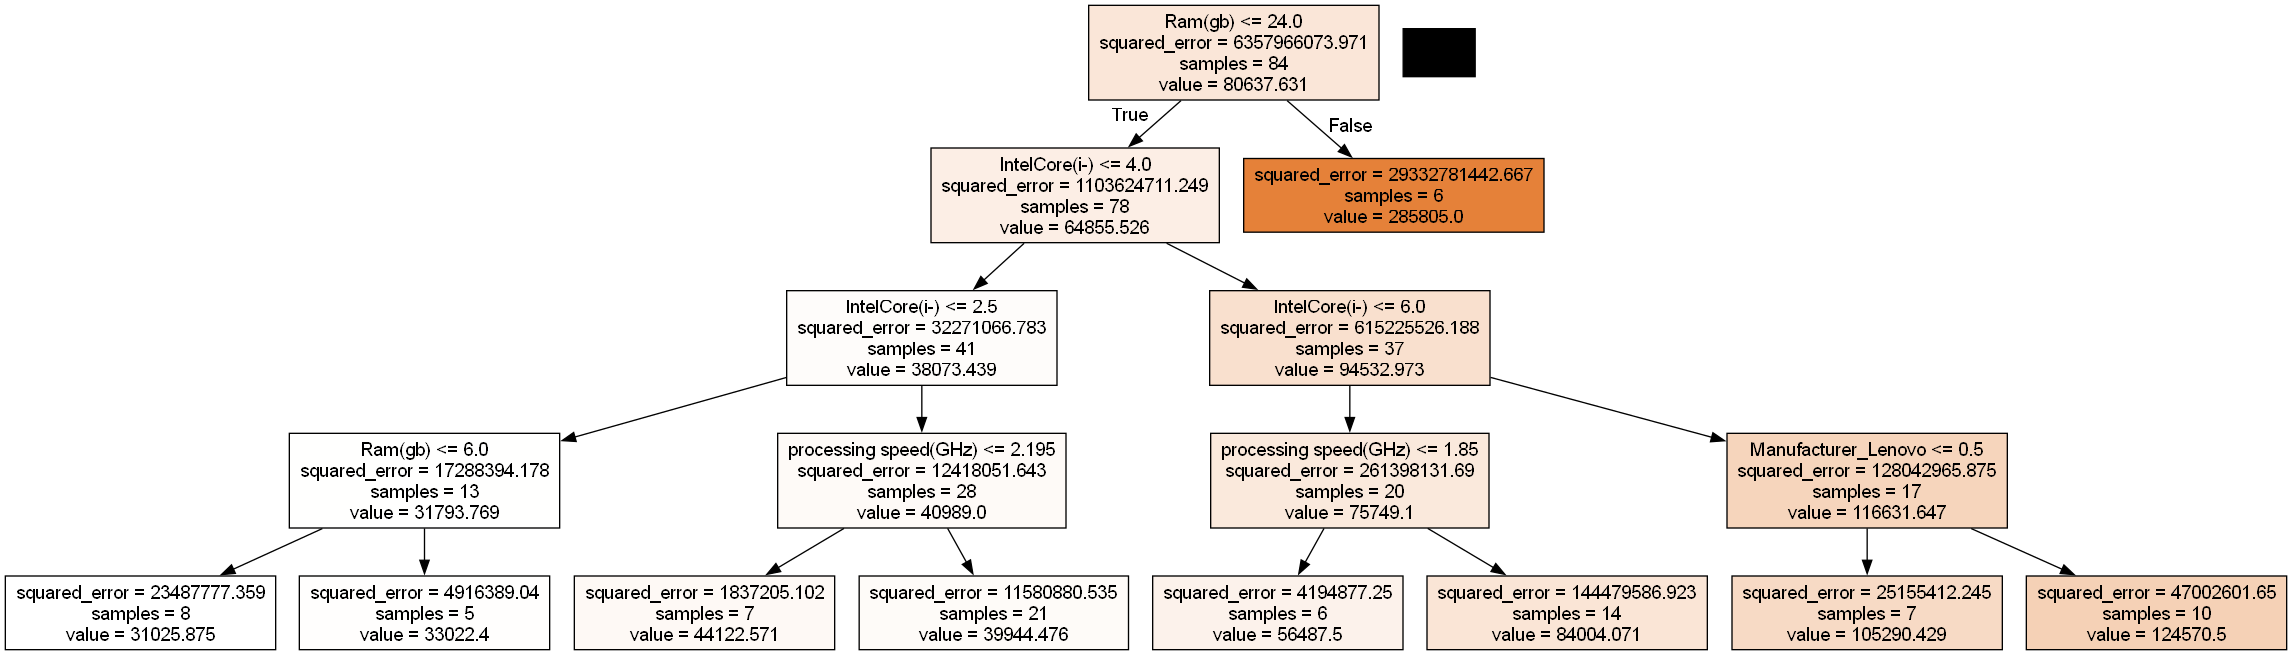

In [14]:
from IPython.display import Image
import pydotplus

dot_data = tree.export_graphviz(reg, out_file=None, feature_names=X.columns, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())